In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
import warnings
from utils import ModelComparator
from mlp import MLPClassifier
from xgboost import XGBClassifier
warnings.filterwarnings(action="ignore")

In [2]:
X = pd.read_table('x_train.txt', sep=" ", header=None)
y = pd.read_table('y_train.txt', header=None).to_numpy(dtype=np.int8).squeeze()

In [3]:
comparator = ModelComparator(X, y, n_splits=10)

# Initial results

In [4]:
from sklearn.linear_model import LogisticRegression

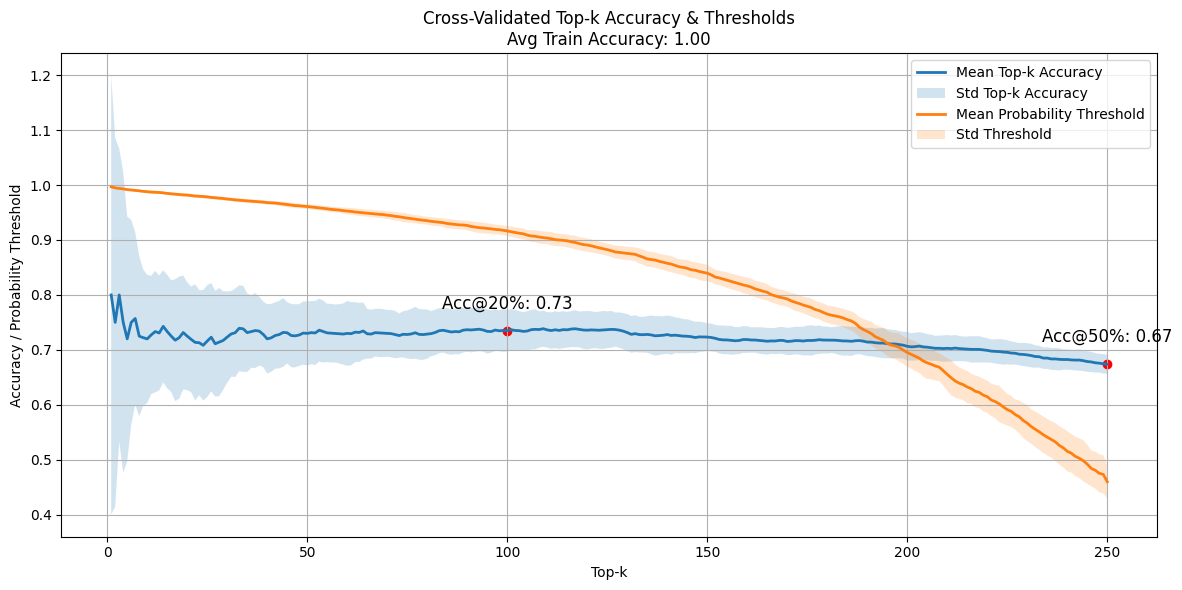

0.7366336633663365

In [5]:
comparator.evaluate_model(XGBClassifier(),
                          variables=None) # If None, calculates with all variables

### Example with custom MLP classifier

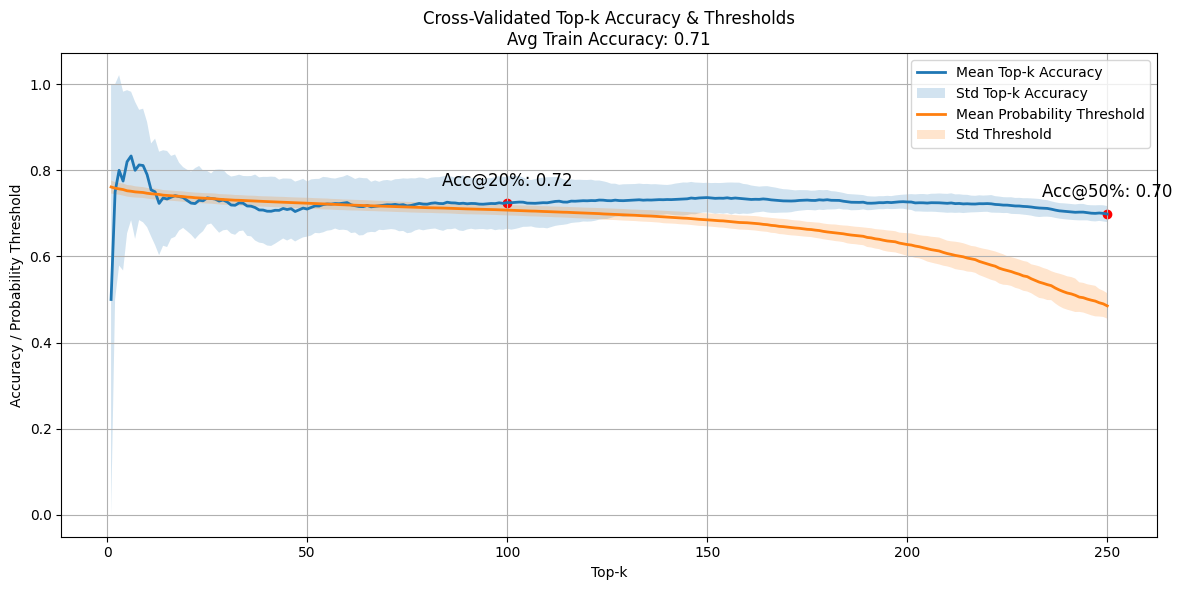

0.7247524752475246

In [ ]:
model = MLPClassifier(epochs=20, lr=0.001, weight_decay=0, batch_size=64)

comparator.evaluate_model(model,
                          variables=[2, 353]) # This method also returns Acc@20%

# Feature selection

Will be performed independently from original column names, for example: <br>
`Selected features = [0, 5, 440]` may in fact be `[1, 7, 468]` from original dataset

## VIF

Performed iteratively according to methodology:
1. calculate VIF of every variable and choose those with `VIF > 5`
2. Among those found in point 1, remove this variable with **lowest** Mutual Information Score (with relation to target `y`)

In [ ]:
# Only results of this method provided (it is computationally expensive)
from utils import VIF_SELECTED_VARIABES

print(VIF_SELECTED_VARIABES)

[13, 178, 194, 298, 305, 117, 228, 462, 414, 425, 0, 1, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
# Note: This deletion will change columns order! (col 2 becomes 0, for example)
#       Perform it only ONCE!
X = np.delete(X, VIF_SELECTED_VARIABES, axis=1)

print(X.shape)

(4750, 481)
(250, 481)


## ANOVA F-test

In [13]:
from sklearn.feature_selection import f_classif

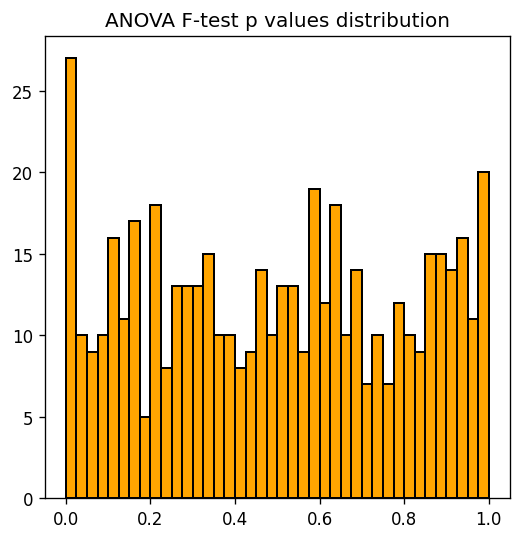

In [30]:
F_statistic_values, p_values = f_classif(X, y)

top_f_test_features = np.argsort(p_values)
bottom_f_test_features = np.argsort(p_values)[::-1]
plt.figure(dpi=120, figsize=(5,5))
plt.hist(p_values, edgecolor='black', linewidth=1.2, color="orange", bins=40)
plt.title("ANOVA F-test p values distribution")
plt.show()

In [8]:
top_f_test_features

array([  2,   3,   6,   7,   4,   8,   5,   0,   1,   9, 414, 462, 425,
       458, 351, 339, 395, 170, 180, 356, 300, 215, 140, 293, 344, 343,
       366, 336, 330, 332, 294, 237, 446, 285, 176,  41, 387, 133, 109,
       253, 158, 459, 126,  47,  76, 117,  92, 201,  86, 231, 157, 146,
       274, 163, 430, 463,  73, 325, 150,  77, 358, 355,  90,  33,  88,
        97, 263, 422, 436, 367, 209, 405, 401, 477, 226,  71, 152, 318,
       440, 183,  36, 479, 371, 186,  55, 286, 223, 460,  96, 121, 213,
       297, 281, 214, 323, 155, 220, 346, 217, 475, 262, 494, 169, 485,
       127,  93, 338,  24, 421, 206, 434, 191, 134,  64, 372, 315, 309,
        46, 198, 268, 123, 137, 287, 368, 202, 481, 444, 365, 135, 320,
       267, 173, 348, 218, 433, 397,  74,  51, 115, 399, 312, 375, 148,
       139, 101, 103, 197, 275, 498, 219, 451, 184, 353, 185,  37, 108,
       114, 232, 251, 441, 439, 471, 394, 402, 363, 200, 131, 389, 324,
        81, 249, 298, 334, 257, 171, 496, 398, 391, 246,  87, 37

## ReliefF

In [6]:
from skrebate import ReliefF

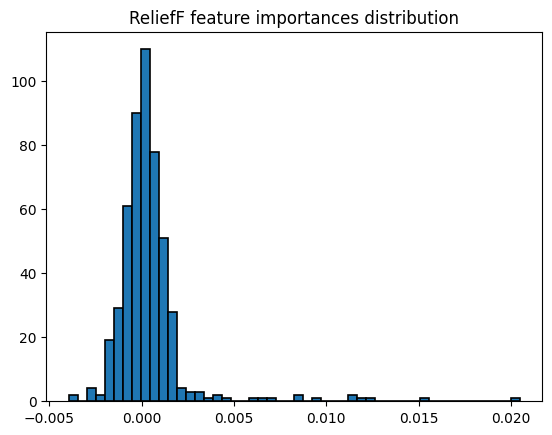

In [ ]:
relief = ReliefF(n_neighbors=10, n_features_to_select=10)
relief.fit(np.array(X), y)

top_relief_features = relief.top_features_

plt.hist(relief.feature_importances_, edgecolor='black', bins=50, linewidth=1.2)
plt.title("ReliefF feature importances distribution")
plt.show()

In [9]:
relief.top_features_

array([  2,   3,   6,   7,   4,   8,   5,   0,   1, 414,   9, 462, 425,
       354, 300, 360, 388, 322, 311, 344, 331, 343, 177, 368, 437, 466,
       279, 329, 310, 172, 320, 154, 386, 497, 323,  60, 147,  31, 121,
       146, 371,  41, 194,  48, 404, 476,  81, 133, 302, 131, 346,  50,
       362, 270, 298, 307, 306, 182, 113,  43, 324, 184,  91, 473, 389,
       339, 142, 488,  66,  11,  76, 229,  75, 192, 478, 251, 125, 211,
       482, 348,  82, 465, 283, 461, 415,  57, 190, 152, 119, 238,  58,
       313, 359, 185, 225, 493, 215, 101, 228, 241, 378, 430, 135,  25,
       447, 419, 372,  89, 260, 407, 314, 290, 107, 383, 165, 263, 457,
       216, 227, 198,  86, 266, 122, 487,  22,  47, 342, 201,  15, 271,
        42, 284,  95, 143, 434, 416, 424,  10, 223, 139,  96,  94, 112,
        18, 334, 491, 451, 398, 445, 111, 179, 358, 413, 237, 400, 220,
       235, 428, 382, 244, 137, 219, 249,  28,  68,  30, 335, 355, 103,
       446, 401, 163, 484, 485, 489, 258, 155,  59, 422, 174,  1